<a href="https://colab.research.google.com/github/gabrieldimas/machine-learning-study-2023/blob/main/Quiz2/OCR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [5]:
# import library

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [6]:
# import mnist

from tensorflow.keras.datasets import mnist

In [7]:
# memuat dataset MNIST ke dalam dua set

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [4]:
# mengecek shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [8]:
# mengecek shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [9]:
# mengecek shape tiap data --> harus 28*28
train_data[0].shape

(28, 28)

In [10]:
# mengecek label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [11]:
# menggabungkan data pelatihan dan pengujian dari dataset MNIST menjadi satu set data

digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [12]:
# mengecek shape data

digits_data.shape

(70000, 28, 28)

In [13]:
# mengecek shape label

digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 8')

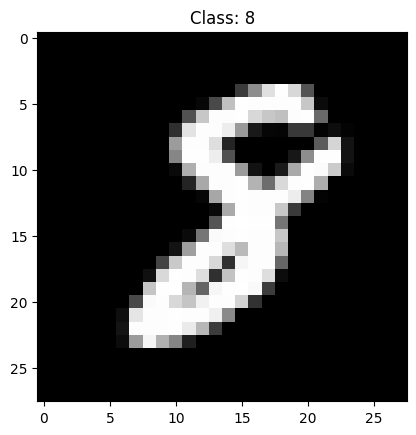

In [14]:
# mengecek data secara random

idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

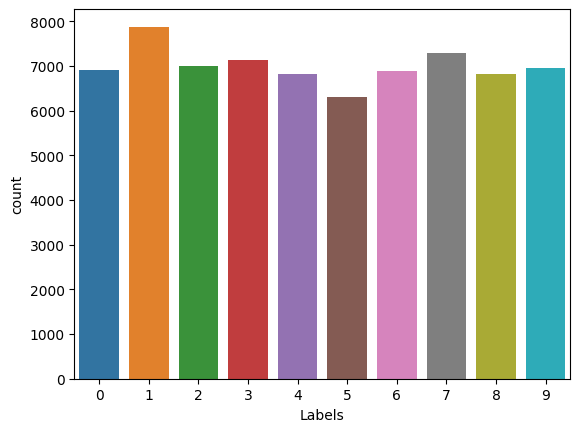

In [15]:
# mengecek distribusi data

df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [16]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-01 07:01:48--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   178MB/s    in 1.0s    

2023-12-01 07:01:50 (178 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [17]:
# mengekstrak file zip

zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [18]:
# membaca dataset

dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# mengambil data pixel saja

alphabet_data = dataset_az.drop('0', axis=1)

# mengambil label saja

alphabet_labels = dataset_az['0']

In [20]:
# mengecek shape data

alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [21]:
# mengecek shape label

alphabet_labels.shape

(372450,)

In [22]:
# mengubah ukuran pixel data menjadi 28*28

alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# mengecek hasil

alphabet_data.shape

(372450, 28, 28)

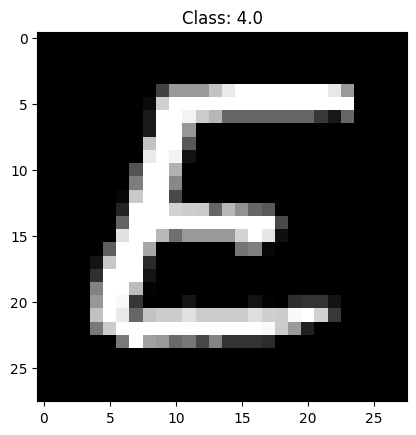

In [23]:
# mengecek dataset A-Z secara random

index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

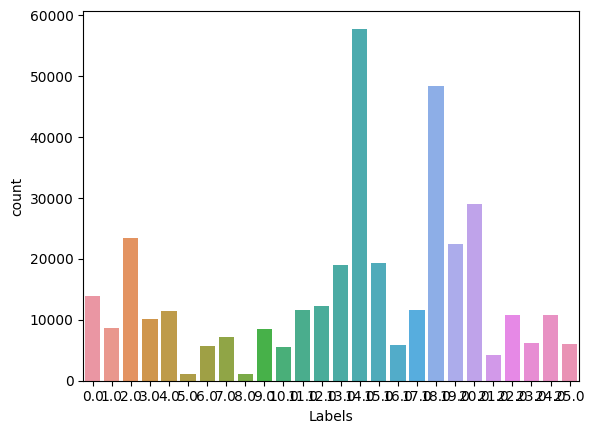

In [24]:
# mengecek distribusi data

df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [26]:
# mengecek nilai yang unik dari digits_labels

np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
# mengecek nilai yang unik dari digits_labels

np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [28]:
# menambahkan nilai 10 pada setiap elemen dalam variabel alphabet_labels

alphabet_labels += 10

In [29]:
# mengecek alphabet_labels

np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [30]:
# menggabungkan

data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [31]:
# mengecek shape

data.shape, labels.shape

((442450, 28, 28), (442450,))

In [32]:
# mengecek labels

np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [33]:
# mengkonversi data ke float32

data = np.array(data, dtype = 'float32')

In [34]:
# menambah satu dimensi pada akhir array data

data = np.expand_dims(data, axis=-1)

# mengecek shape

data.shape

(442450, 28, 28, 1)

# Preprocessing

In [35]:
# menormalisasi data

data /= 255.0

In [36]:
# mengecek jangkauan nilai dari data

data[0].min(), data[0].max()

(0.0, 1.0)

In [37]:
# melakukan enconde the labels

le = LabelBinarizer()
labels = le.fit_transform(labels)

In [38]:
# mengecek shape labels

labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

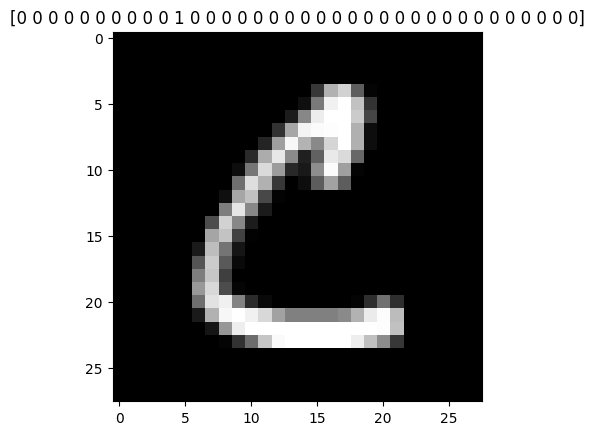

In [39]:
# mengecek data dengan label binarizer's label

plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [40]:
# mengecek angka pada data untuk tiap labels

classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [41]:
# mengecek nilai yang paling besar di dalam data

classes_total.max()

57825

In [42]:
# membuat bobot untuk tiap data

classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# mengecek bobot tiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [44]:
# membagi dataset menjadi data pelatihan (train) dan data pengujian (test) bersama dengan label-labelnya

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [45]:
# mengimport library

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
# menginisialisasi objek ImageDataGenerator dari library Keras, yang akan digunakan untuk melakukan augmentasi gambar.

augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [47]:
# mengimport library

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [51]:
# membuat jaringan

network = Sequential()

# Membuat model neural network sebagai urutan layer dengan menggunakan objek Sequential. Dalam objek ini, layer-layer akan ditambahkan secara berurutan.

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan layer Convolutional 2D dengan 32 filter, kernel size 3x3, fungsi aktivasi ReLU, dan input shape (28,28,1). Ini adalah layer pertama dari model, yang digunakan untuk mengekstrak fitur-fitur dari gambar input.
# Menambahkan layer MaxPooling 2D dengan pool size 2x2. Layer ini digunakan untuk mengurangi dimensi spatialis dari output Convolutional layer sebelumnya.

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan Convolutional layer kedua dengan 64 filter, kernel size 3x3, fungsi aktivasi ReLU, dan menggunakan padding 'same' untuk menjaga dimensi spatial.
# Menambahkan MaxPooling layer kedua.

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan Convolutional layer ketiga dengan 128 filter, kernel size 3x3, fungsi aktivasi ReLU, dan menggunakan padding 'valid' untuk tidak menggunakan padding.
# Menambahkan MaxPooling layer ketiga.

network.add(Flatten())

# Menambahkan layer Flatten untuk mengubah output dari layer sebelumnya menjadi satu dimensi.

network.add(Dense(64, activation = 'relu'))

# Menambahkan layer Dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU.

network.add(Dense(128, activation = 'relu'))

# Menambahkan layer Dense kedua dengan 128 neuron dan fungsi aktivasi ReLU.

network.add(Dense(36, activation='softmax'))

# Menambahkan layer Dense terakhir dengan 36 neuron (sesuai dengan jumlah kelas huruf A-Z dan 0-9) dan menggunakan fungsi aktivasi softmax untuk output layer klasifikasi.

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Mengompilasi model dengan menggunakan categorical crossentropy sebagai fungsi loss, optimizer Adam, dan metrik akurasi untuk evaluasi kinerja model selama pelatihan. Model sekarang siap untuk dilatih pada data.

In [50]:
# mengecek summary dari network

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [52]:
# membuat labels asli
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# mengecek label asli
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [53]:
# mengatur nama model, jumlah epoch, dan ukuran batch

file_model = 'custom_ocr.model' # memberi nama model
epochs = 20 # mengatur jumlah epochs
batch_size = 128 # mengatur ukuran tiap batch

In [54]:
# menentukan checkpoints

checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [55]:
# fitting model

history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1700 - accuracy: 0.8256
Epoch 1: val_loss improved from inf to 0.27232, saving model to custom_ocr.model
2765/2765 [==============================] - 135s 44ms/step - loss: 2.1700 - accuracy: 0.8256 - val_loss: 0.2723 - val_accuracy: 0.8877
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9696 - accuracy: 0.9030
Epoch 2: val_loss improved from 0.27232 to 0.27168, saving model to custom_ocr.model
2765/2765 [==============================] - 133s 48ms/step - loss: 0.9697 - accuracy: 0.9030 - val_loss: 0.2717 - val_accuracy: 0.8883
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8140 - accuracy: 0.9143
Epoch 3: val_loss improved from 0.27168 to 0.19649, saving model to custom_ocr.model
2765/2765 [==============================] - 126s 46ms/step - loss: 0.8140 - accuracy: 0.9143 - val_loss: 0.1965 - val_accuracy: 0.9249
Epoch 4/20
2765/2765 [=========================

# Evaluate Model

## Make a Single Prediction

In [57]:
# membuat prediksi

predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [58]:
# mengecek prediksi untuk data-0 dan mengambil probabilitas untuk tiap label
# yang paling tinggi adalah angka prediksi

predictions[1]

array([2.8917720e-19, 1.3779027e-07, 6.2308817e-12, 1.6858904e-15,
       1.7333562e-18, 3.2307643e-08, 7.1017350e-12, 2.5575863e-13,
       9.4753281e-17, 3.2321266e-19, 3.5919080e-15, 2.9641494e-16,
       1.6093665e-11, 1.6360834e-14, 1.2591457e-11, 2.8704276e-12,
       3.8344139e-10, 1.4175835e-12, 9.9982917e-01, 1.7018618e-04,
       3.8316955e-17, 4.1517886e-11, 5.8712105e-18, 7.8548733e-17,
       2.7408572e-12, 3.1019353e-14, 5.9892327e-23, 8.6431639e-17,
       5.1745882e-11, 5.3129946e-07, 1.2844184e-15, 1.6411798e-23,
       1.4352783e-24, 1.8777619e-14, 9.6689800e-13, 2.7492921e-12],
      dtype=float32)

In [59]:
# mengambil prediksi asli -> probabilitas tertinggi

np.argmax(predictions[1])

18

In [60]:
# mengecek label untuk 24

name_labels[18]

'I'

In [61]:
# mengecek y_test label untuk 0

y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
# mengecek angka paling tinggi

np.argmax(y_test[1])

18

In [63]:
# mengecek label dari y_test 0

name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [64]:
# mengevaluasi data test

network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1563 - accuracy: 0.9473


[0.156288743019104, 0.9472596049308777]

In [65]:
# menampilkan classification report

print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.42      0.60      0.49      1381
           1       0.95      1.00      0.97      1575
           2       0.88      0.97      0.93      1398
           3       0.98      0.99      0.99      1428
           4       0.86      0.98      0.92      1365
           5       0.55      0.96      0.70      1263
           6       0.94      0.98      0.96      1375
           7       0.95      0.99      0.97      1459
           8       0.96      0.98      0.97      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.98      0.99      2774
           B       0.98      0.98      0.98      1734
           C       1.00      0.97      0.98      4682
           D       0.86      0.97      0.91      2027
           E       0.99      0.98      0.99      2288
           F       0.89      1.00      0.94       233
           G       0.97      0.93      0.95      1152
           H       0.97    

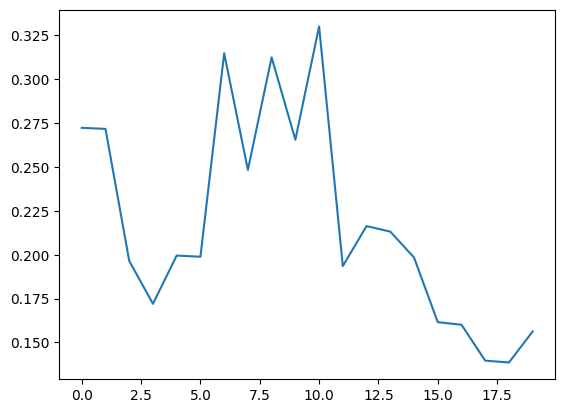

In [66]:
# membuat visualisasi nilai loss untuk tiap epoch

plt.plot(history.history['val_loss'])

In [67]:
# kita juga bisa melihat metrics lain

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

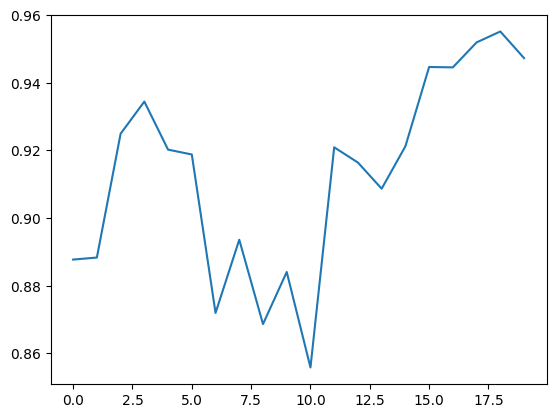

In [68]:
# mengecek performa model dari tingkat validasi akurasi

plt.plot(history.history['val_accuracy'])

# Save The Model

In [69]:
# menyimpan model

network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [70]:
# mengimport library

from tensorflow.keras.models import load_model

In [71]:
# load network yang tersimpan

load_network = load_model('network')

In [72]:
# melihat summary

load_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


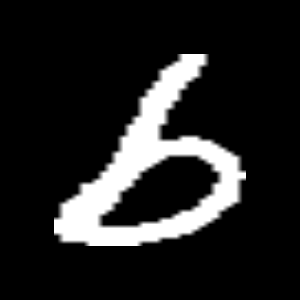

In [74]:
# load gambar

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Kuliah/MachineLearning/Quiz 2/b_small.png')
cv2_imshow(img)

In [75]:
# mengecek shape

img.shape

(300, 300, 3)

In [76]:
# konversi ke gray

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mengecek shape

gray_img.shape

(300, 300)

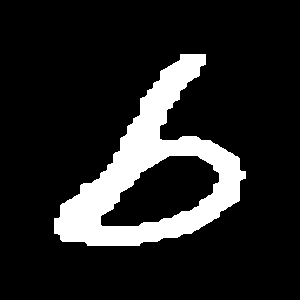

120.0


In [77]:
# preprocessing
# binary threshold dan otsu threshold

value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# menampilkan nilai threshold

print(value)

In [78]:
# mengubah ukuran gambar untuk mencocokan shape input network -> 28*28

img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [80]:
# konversi ke float 32

img_input = img_resize.astype('float32') / 255 # normalisasi
img_input = np.expand_dims(img_input, axis=-1) # masukkan kedalamn

# mengecek shape

img_input.shape

(28, 28, 1)

In [81]:
# menambahkan "amount of data" sebagai dimensi

img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [82]:
# membuat prediksi

prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # prediksi label asli
pred_label

1/1 [==============================] - 0s 229ms/step


6

In [83]:
# mengecek label untuk 6

name_labels[6]

'6'